In [1]:
#Differential gene expression pipeline
#Data from https://www.kaggle.com/code/vsevolodcherepanov/rna-seq-data-differential-expression-analysis

from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [7]:
import pandas as pd

In [120]:
counts=pd.read_csv("fibrosis_smoc2_rawcounts.csv")

In [121]:
counts

,Unnamed: 0,smoc2_fibrosis1,smoc2_fibrosis4,smoc2_normal1,smoc2_normal3,smoc2_fibrosis3,smoc2_normal4,smoc2_fibrosis2
0,ENSMUSG00000102693,0,0,0,0,0,0,0
1,ENSMUSG00000064842,0,0,0,0,0,0,0
2,ENSMUSG00000051951,72,30,0,3,36,1,51
3,ENSMUSG00000102851,0,0,0,0,0,0,0
4,ENSMUSG00000103377,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
47724,ENSMUSG00000094431,0,0,0,0,0,0,0
47725,ENSMUSG00000094621,0,1,0,0,0,1,0
47726,ENSMUSG00000098647,0,0,0,0,0,0,0
47727,ENSMUSG00000096730,0,0,0,0,0,0,0


In [115]:
counts = counts.rename(columns={ counts.columns[0]: 'Gene_ID' })

In [116]:
counts = counts.set_index('Gene_ID')

In [117]:
column_names = ['smoc2_fibrosis1', 'smoc2_fibrosis4', 'smoc2_normal1', 'smoc2_normal3', 'smoc2_fibrosis3', 'smoc2_normal4', 'smoc2_fibrosis2']

# Sort the columns based on numerical part
sorted_columns = sorted(column_names)

# Reorder the DataFrame columns
counts = counts[sorted_columns]

In [30]:
#Get rid of columns with only zero counts
counts=counts[counts.sum(axis=1) > 0]

In [32]:
counts=counts.T

In [36]:
metadata=pd.DataFrame(zip(counts.index, ['T','T','T','T','C','C','C']), columns=['Sample','Condition'])

In [37]:
metadata=metadata.set_index('Sample')

In [40]:
dds= DeseqDataSet(counts=counts,metadata=metadata,design_factors="Condition")

In [45]:
dds.deseq2()

Fitting size factors...
... done in 0.04 seconds.

Fitting dispersions...
... done in 33.42 seconds.

Fitting dispersion trend curve...
... done in 1.50 seconds.

Fitting MAP dispersions...
... done in 30.48 seconds.

Fitting LFCs...
... done in 17.29 seconds.

Replacing 0 outlier genes.



In [47]:
stat_res=DeseqStats(dds, contrast =('Condition','T','C'))

In [48]:
stat_res.summary()

Running Wald tests...
... done in 5.45 seconds.



Log2 fold change & Wald test p-value: Condition T vs C
                       baseMean  log2FoldChange     lfcSE      stat   
Gene_ID                                                               
ENSMUSG00000051951    22.478090        4.497980  0.822075  5.471499  \
ENSMUSG00000103377     0.201024       -1.591733  4.112712 -0.387028   
ENSMUSG00000103147     0.674871        0.853524  2.161143  0.394941   
ENSMUSG00000103161     0.131948        0.091396  4.199604  0.021763   
ENSMUSG00000102331     2.894279        1.706370  1.189843  1.434114   
...                         ...             ...       ...       ...   
ENSMUSG00000095041  3114.299057        0.897257  0.149168  6.015088   
ENSMUSG00000063897   665.271840       -0.289975  0.121219 -2.392150   
ENSMUSG00000084520     0.114469        0.091396  4.199604  0.021763   
ENSMUSG00000094621     0.300363       -0.870391  3.872033 -0.224789   
ENSMUSG00000095742   682.741942        1.822383  0.223723  8.145718   

                     

In [59]:
res= stat_res.results_df

In [51]:
!pip install sanbomics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.2 MB/s eta 0:00:0000:0100:010m


In [60]:
from sanbomics.tools import id_map

In [63]:
mapper = id_map(species='mouse')

In [65]:
res['Symbol']=res.index.map(mapper.mapper)

In [67]:
res = res[res.baseMean >=10]

In [68]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Gene_ID,,,,,,,
ENSMUSG00000051951,22.478090,4.497980,0.822075,5.471499,4.462461e-08,1.791668e-07,Xkr4
ENSMUSG00000025900,12.069501,-2.396201,0.585062,-4.095636,4.210104e-05,1.250266e-04,Rp1
ENSMUSG00000025902,347.342106,-0.454029,0.167271,-2.714325,6.641103e-03,1.401414e-02,Sox17
ENSMUSG00000033845,1380.357118,-0.894271,0.097405,-9.180944,4.273302e-20,3.957077e-19,Mrpl15
ENSMUSG00000102275,21.246007,-0.122040,0.389470,-0.313349,7.540156e-01,8.169447e-01,NaN
...,...,...,...,...,...,...,...
ENSMUSG00000061654,11.946928,-1.693679,0.508792,-3.328824,8.721362e-04,2.161657e-03,NaN
ENSMUSG00000079834,436.674819,-1.230689,0.130648,-9.419884,4.515879e-21,4.382920e-20,NaN
ENSMUSG00000095041,3114.299057,0.897257,0.149168,6.015088,1.797889e-09,8.142860e-09,AC149090.1


In [70]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) >0.5) & (res.baseMean>20)]

In [71]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Gene_ID,,,,,,,
ENSMUSG00000051951,22.478090,4.497980,0.822075,5.471499,4.462461e-08,1.791668e-07,Xkr4
ENSMUSG00000033845,1380.357118,-0.894271,0.097405,-9.180944,4.273302e-20,3.957077e-19,Mrpl15
ENSMUSG00000025903,2522.975148,-1.916347,0.150540,-12.729799,4.038756e-37,8.395667e-36,Lypla1
ENSMUSG00000033793,1921.191923,-0.906272,0.084327,-10.747140,6.112743e-27,7.962199e-26,Atp6v1h
ENSMUSG00000051285,1575.290749,-0.598611,0.145837,-4.104664,4.049031e-05,1.206301e-04,Pcmtd1
...,...,...,...,...,...,...,...
ENSMUSG00000064370,372888.853976,-1.732053,0.123771,-13.993963,1.696873e-44,4.973913e-43,Mt-Cyb
ENSMUSG00000064372,757.432529,-0.966186,0.263889,-3.661341,2.508986e-04,6.742259e-04,NaN
ENSMUSG00000079834,436.674819,-1.230689,0.130648,-9.419884,4.515879e-21,4.382920e-20,NaN


In [75]:
import scanpy as sc

In [76]:
sc.tl.pca(dds)

/Users/bedabratachoudhury/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


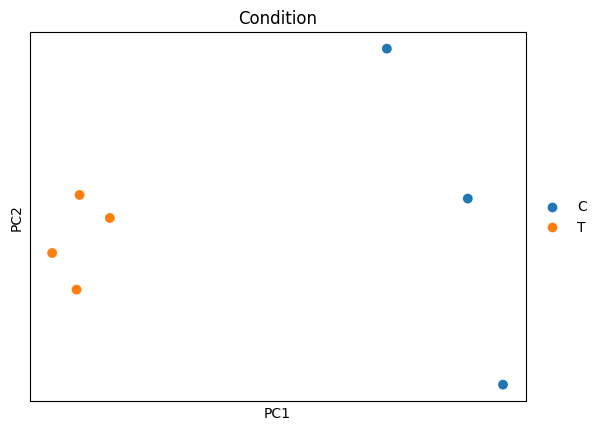

In [78]:
sc.pl.pca(dds, color = 'Condition', size=200)

In [79]:
ranking = res[['Symbol','stat']].dropna().sort_values('stat', ascending=False)

In [81]:
ranking = ranking.drop_duplicates('Symbol')

In [126]:
ranking

,Symbol,stat
Gene_ID,,
ENSMUSG00000029811,Aoc1,49.996998
ENSMUSG00000036887,C1qa,27.727350
ENSMUSG00000032332,Col12a1,27.587410
ENSMUSG00000036905,C1qb,27.553596
ENSMUSG00000001435,Col18a1,27.313652
...,...,...
ENSMUSG00000032047,Acat1,-28.298250
ENSMUSG00000027870,Hao2,-28.381023
ENSMUSG00000018796,Acsl1,-29.082391


In [84]:
! pip install gseapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 2.7 MB/s eta 0:00:0000:0100:01


In [89]:
import numpy as np
import seaborn as sns

In [91]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [92]:
dds_sigs = dds[:, sigs.index]

In [93]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

/Users/bedabratachoudhury/miniconda3/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/bedabratachoudhury/miniconda3/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


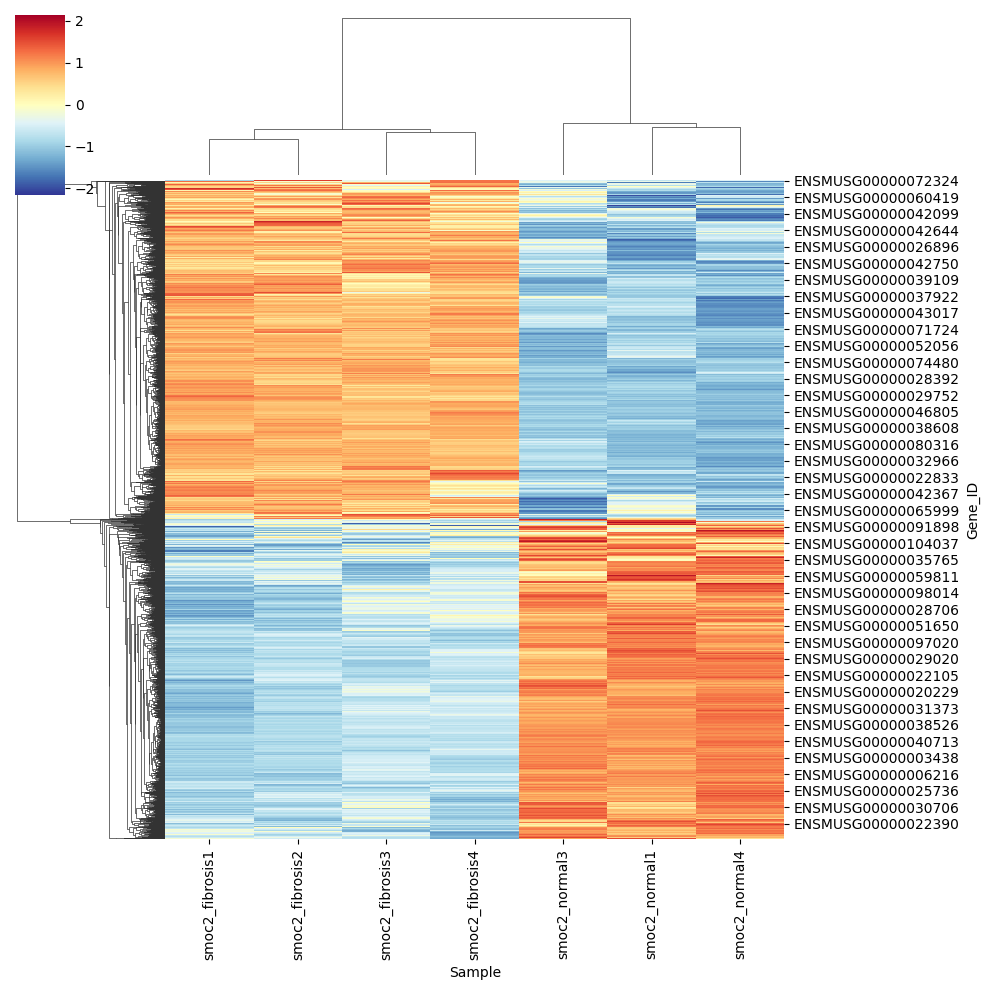

In [94]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

In [101]:
#Gene names obtained from GPT

with open('fib_mouse.txt') as f:
    senGPT = [x.strip() for x in list(f)]

In [104]:
dds_sub = dds[:, sigs[sigs.Symbol.isin(senGPT)].index]

In [105]:
grapher = pd.DataFrame(dds_sub.layers['log1p'].T,
                       index=dds_sub.var_names, columns=dds_sub.obs_names)

In [106]:
grapher.index = grapher.index.map(mapper.mapper)

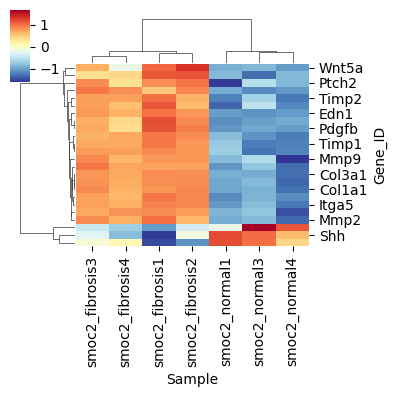

In [122]:
ax = sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r', figsize=(4,4))

In [95]:
#volcano
from sanbomics.plots import volcano

0s encountered for p value, imputing 1e-323
impute your own value if you want to avoid this


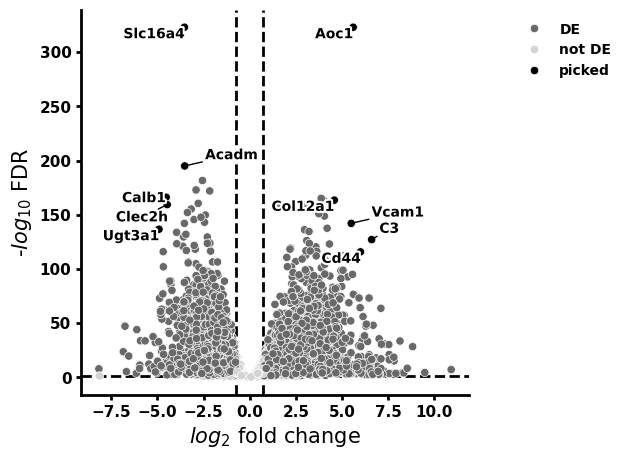

In [99]:
volcano(res, symbol='Symbol')

In [112]:
grapher.index


Index(['Col3a1', 'Fn1', 'Mmp9', 'Timp1', 'Ptch2', 'Shh', 'Pdgfa', 'Col1a2',
       'Tgfb1', 'Ednra', 'Mmp2', 'Itgb1', 'Wnt5a', 'Ednrb', 'Ccl2', 'Ccl5',
       'Col1a1', 'Timp2', 'Agtr1a', 'Edn1', 'Tgfb3', 'Pdgfb', 'Itga5',
       'Smad2'],
      dtype='object', name='Gene_ID')

0s encountered for p value, imputing 1e-323
impute your own value if you want to avoid this


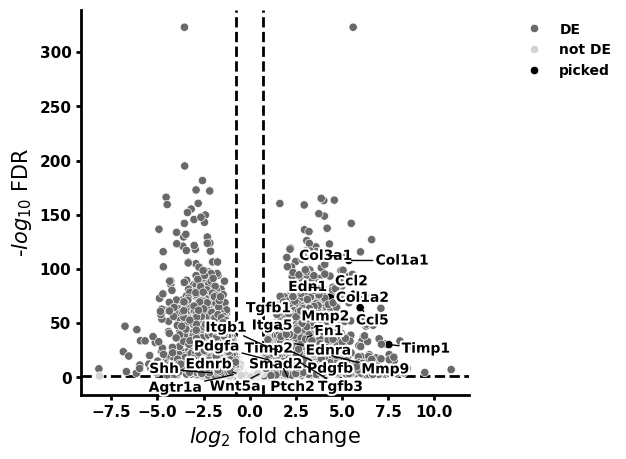

In [109]:
volcano(res, symbol='Symbol', to_label = grapher.index)
